# Function approximation and machine learning

>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

In [1]:
# run this cell to import all necessary libraries for the notebook experiments
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('demo_python_backend_files')
import super_viz_lib

# 1.  Function fundamentals

Here we discuss a number of fundamental concepts regarding mathematical functions that will be very useful in our future discussions.  This includes two common ways of viewing mathematical functions: as an equation, and as a table of values (or collection of *data*), the notion of function approximation, and mathematical bases. 

## 1.1  Two common ways of thinking about functions

In secondary school math classes you learn about all sorts of mathematical functions: lines, parabolas, polynomials, sine waves, etc.,  A function is just a rule for transforming inputs into an associated set of outputs - like a recipe they tell you how to transform ingredient(s) into a useful product.  

One of the primary ways we are taught to think about mathematical functions is via their *equation* - or in other words by their explicit rule(s).  For example, take the commonly taught equation of a line

$$ y = w_0 + w_1x$$

This is an explicitly written rule for taking an input $x$ and transforming it into an associated $y$.  Given a specific input $x$ how do we transform it to get its associated output?  We multiply it by the weight $w_1$ and add the weight $w_0$.  

Lets plot a picture of this rule in the next cell - here the line is shown in red.

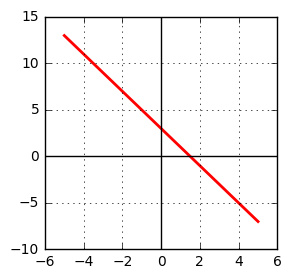

In [43]:
# draw a line over a small range of its input
x = np.linspace(-5,5,50)               # range of input for our functions
w_0 = 3
w_1 = -2
y = w_0 + w_1*x
line_table = np.stack((x,y),axis = 1)  # make table of values for our function

# plot line
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)
ax.plot(line_table[:,0],line_table[:,1],c='r',linewidth=2)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

Writing down the equation of the line gives us *its rule*, its recipe for transforming inputs.  And so one valid way of thinking about what a line is via its rule - a line is its equation.  This is the *equation view of a mathematical function*.

>One valid way to think about a function is that it *is* its equation - its explicitly defined rule for transforming inputs into outputs.  We call this the *equation view* of a mathematical function.

Another way to think about a function is to view it as the actual set of input/output pairs defined by its equation - a table of values.  *This is how we are able to graph functions like the one above.*  For a function like a line this is a collection of *infinitely many* pairs that we can list off one-by-one (we plotted just a subsample of these pairs).  Say for example that $w_0 = 3$ and $w_1 =-2$ as in the plot above, then the associated table of values (listed in no particular order) looks like

$$\begin{array}{c|c}
~~ \text{Input} ~ (x) &  ~~ \text{Output} ~~ (3 -2 x) \\
\hline 0 & 3 \\
\ -0.4 & 3.8 \\
\ 5.2 & -7.2 \\
\vdots & \vdots\\
\end{array}$$

We can find - somewhere on this infinitely long table - the input/output pair for any input number we can think of.  

When we take *the table view* of a function we view it as a (possibly infinitely long) listing of explicit input/output pairs, not as its equation. So while the output of these pairs is indeed generated by the function's equation we need not have the explicit function itself, as given such a table we have a complete understanding of the function - one input/output pair at a time.  

>Another valid way to think about a function is as a (possibly infinitely long) table of explicit input/output values defined by its equation.  We call this the *table view* of a mathematical function.  Using a subset of these table values we can visualize (i.e,. graph) functions with one or two inputs.

Another common function we learn about in secondary school is the *parabola*. To get a parabola we just square the input $x$ and add it to the line above - a simple enough adjustment whose equation looks like

$$ y = w_0 + w_1x + w_2x^2$$

We can plot a parabola with explicit values for the weights $w_0$, $w_1$, and $w_2$ as in the next cell.

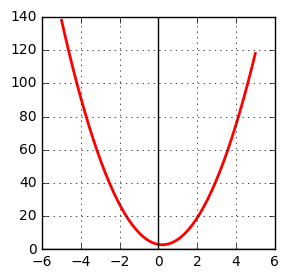

In [44]:
# draw a line over a small range of its input
x = np.linspace(-5,5,50)                     # range of input for our functions
w_0 = 3
w_1 = -2
w_2 = 5
y = w_0 + w_1*x + w_2*x**2
parabola_table = np.stack((x,y),axis = 1)    # make table of values for our function

# plot line
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)
ax.plot(parabola_table[:,0],parabola_table[:,1],c='r',linewidth=2)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

As with the line - we can view a parabola as its equation or as its associated table of values.  For the choice of weights used in the plotting cell above this is an infinitely long table of values that looks like

$$\begin{array}{c|c}
~~ \text{Input} ~(x) & \text{Output}  ~~ (3 -2 x + 5x^2) \\
\hline 0 & 3 \\
\ -0.4 & 4.6 \\
\ 5.2 & 127.8 \\
\vdots & \vdots\\
\end{array}$$

So we can view a line and a parabola via their respective equations or equivalently as tables of input/output pairs.  But this duality - on how to think about mathematical functions - is universal, holding for any function of a single input or a function many inputs too.

## 1.2  From equation to table, and back again (?)

If we had to choose just one of our ways of thinking about a mathematical function discussed above - the *equation* or *table* view - which should we choose?  Another way of posing this question: which should we prefer, knowing the equation of a function or having a table consisting of all its input/output pairs?

The answer here is obvious - if we have the equation of a function we can always generate its associated table of input/output values, while the reverse is not always true.  Say we had the value table for an arbitrary function of one input ($x$.  Yes for simple examples we could - say - plot a range of its input/output table values and guess its associated equation.  But very quickly we would lose our ability to visually identify the equation associated with a table of values, as illustrated by one of the functions generated in the Python cell below.

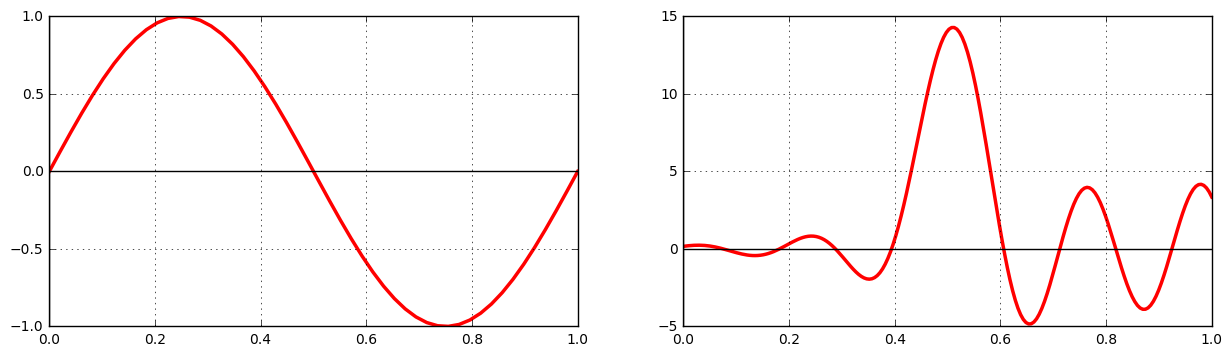

In [61]:
# generate a simple table of values to plot
x = np.linspace(0,1,50)                  # range of input for our functions
wave = np.sin(2*np.pi*x)
wave_table = np.stack((x,wave),axis=1)    # make table of values for our function

# load in a toughy to plot
guess_this_table = np.loadtxt('guess_this.txt',delimiter=',')

# plot these elementary functions 
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122); 
ax1.plot(wave_table[:,0],wave_table[:,1],c = 'r',linewidth = 2.5)
ax2.plot(guess_this_table[:,0],guess_this_table[:,1],c = 'r',linewidth = 2.5)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax1.grid(True, which='both'),ax2.grid(True, which='both')
ax1.axhline(y=0, color='k'),ax2.axhline(y=0, color='k')
ax1.axvline(x=0, color='k'),ax2.axvline(x=0, color='k')

plt.show()

So having plotted the table of values for both functions, you may have been able to spot the equation for the example on the left.  Its given as 

$$y=\text{sin}(2\pi x)$$

How about the one on the right?  A little more challenging, right?  If you guessed

$$y = e^{3x}\frac{\text{sin}(3\pi (x-0.5))}{3{\pi}^2(x-0.5)}$$

then you definitely deserve a pat on the back.  But regardless, you get the point right?  Starting with a function's equation we can easily generate a table of values, but the opposite is not true.  Even with just one input - $x$ - it can generally be quite difficult to guess the equation of a function from its table values.  And even worse most of the time we have more than one input - e.g., 5 inputs - so we can't even graph the function based on its table of values to guess at the equation anyway.

Notice too that the plots as shown above are not *continuous*, although they appear so.  Those plots we made above are actually kind of a trick - an optical illusion.  If you look closely you can see that we only *sampled* input/output data points for each function's table - that is we did not plot all infinitely many, just a small sampling of them.  The plots *look* continuous - the way we might draw them using pencil and paper - because we chose a plotting function from matplotlib that visually *interpolates* smoothly between points it plots.  If we use *scatter* to plot the data instead you can really see all the input/output points we defined individually.  We do this in the next Python cell.

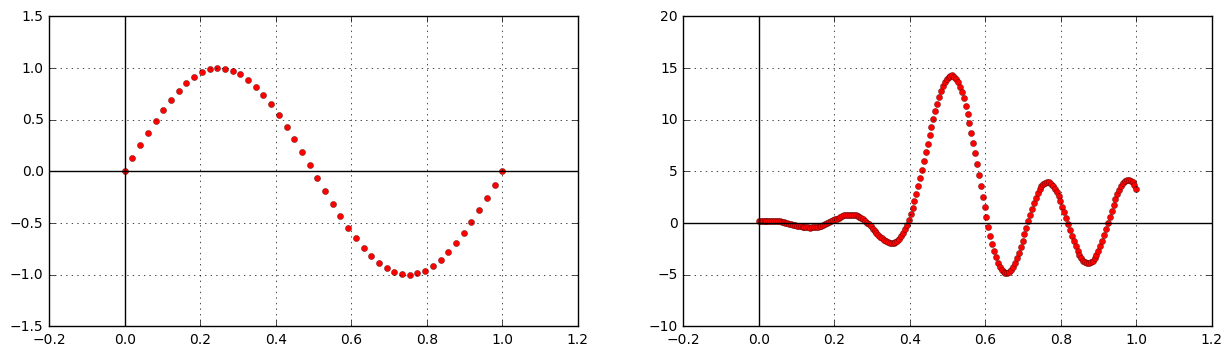

In [63]:
# generate a simple table of values to plot
x = np.linspace(0,1,50)                  # range of input for our functions
wave = np.sin(2*np.pi*x)
wave_table = np.stack((x,wave),axis=1)    # make table of values for our function

# load in a toughy to plot
guess_this_table = np.loadtxt('guess_this.txt',delimiter=',')

# plot these elementary functions 
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122); 
ax1.scatter(wave_table[:,0],wave_table[:,1],c = 'r',linewidth = 0.2)
ax2.scatter(guess_this_table[:,0],guess_this_table[:,1],c = 'r',linewidth = 0.2)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax1.grid(True, which='both'),ax2.grid(True, which='both')
ax1.axhline(y=0, color='k'),ax2.axhline(y=0, color='k')
ax1.axvline(x=0, color='k'),ax2.axvline(x=0, color='k')

plt.show()

In any case, we clearly cannot hope to determine the equation of a function in general simply by plotting its table of values (and examining the result 'by eye').  The reason: such table-only functions can vary widely in shape and dimension - as the example in the right panel above illustrates.

Is there another way to accurately estimate the equation of a table-only function?  Yes, and here it is: we can bootstrap the equation of a function with unknown equation (but known table values) by combining other functions with known equations such that their combined table values closely match those of a table-only function.  This procedure is called *function approximation*.

>We can bootstrap the equation of a function with unknown equation but known table values by combining other functions with known equations such that their combined table values closely match those of the table-only function.  This procedure is called *function approximation*.

## 1.3  Bases mathematical functions

There are a large number of individual mathematical functions with known equations: lines, parabolas, waves, the list goes on and on.  In employing them for function approximation we can talk about them at a higher level - not in terms of single functions but in terms of collections (or *basis*) of functions with known equations.

Some of these collections of functions with known equations are likely familiar to you - e.g., polynomials which you may have learned about in some other context before - while others may be more alien.  However they all serve the same purpose as far as function approximation goes - we can combine them in various ways to estimate the equation of a table-only function.  Lets look at a few collections.

### Example: Polynomials

One very common basis is the set of polynomials - i.e., those functions that look like  

$$f_0(x) = 1, ~~ f_1(x) = x, ~~ f_2(x) = x^2,~~ f_3(x)=x^3,...$$

and so forth with the $m^{th}$ element taking the form $f_m(x) = x^m$.  There are an infinite number of these guys.  The only parameter of a polynomial basis element - its *degree* - is the power the input $x$ is raised too and is fixed.  e.g., $f_m(x)=x^m$ is a polynomial of degree $m$.

Using their equations we can graph the table of values of the first few non-constant polynomial elements - which we do in the next Python cell.

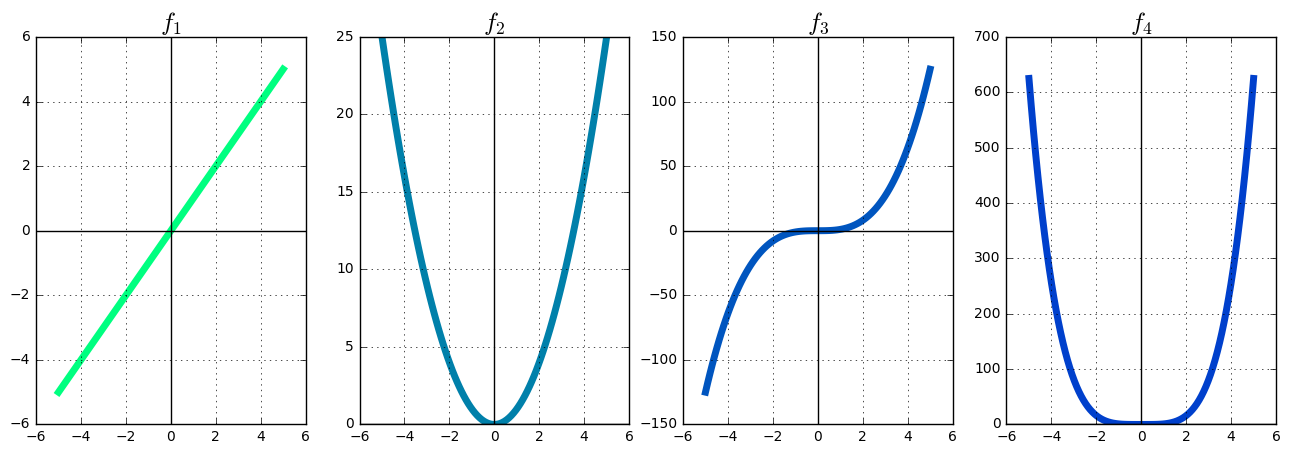

In [8]:
# build the first 4 non-constant polynomial basis elements
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (16,5))

for m in range(1,5):
    # make basis element
    fm = x**m
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],color = [0,1/float(m),m/float(m+1)],linewidth = 5)
    ax.set_title('$f_'+str(m) + '$',fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

### Example: Neural networks

We can construct a rich family of equation-known bases by *composing equation-known functions together*.  For example, composing a line $w_0 + w_1x$ with a sine function $\text{sin}(\cdot)$ we get a basis element

$$f(x) = \text{sin}(w_0 + w_1x)$$

Notice that because there are parameters inside the $\text{sin}$ this basis function can take on a variety of shapes depending on what values we give to $w_0$ and $w_1$.  We illustrate this in the next Python cell by randomly setting these two values and plotting the table of the associated function.

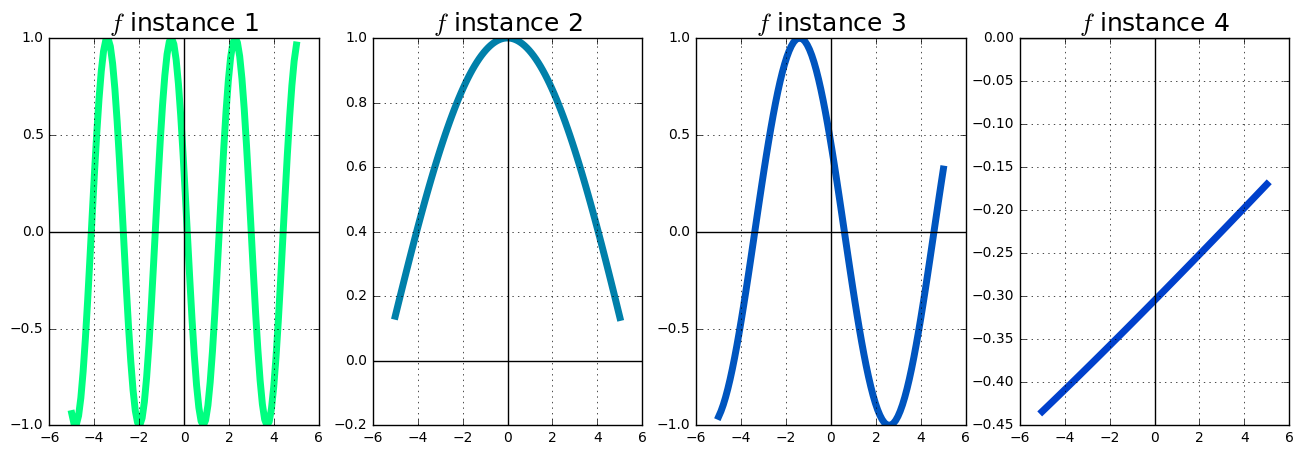

In [11]:
# build 4 instances of a composition basis: line and sine
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (16,5))

for m in range(1,5):
    # make basis element
    w_0 = np.random.randn(1)
    w_1 = np.random.randn(1)
    fm = np.sin(w_0 + w_1*x)
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],color = [0,1/float(m),m/float(m+1)],linewidth = 5)
    ax.set_title('$f$ instance ' + str(m),fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

We can compose other functions as well to create a basis element - for a line and the hyperbolic tangent 

$$f(x)=\text{tanh}(w_0+w_1x)$$

And each such basis element again has considerable flexibility depending on how we set the parameters of the inner line.

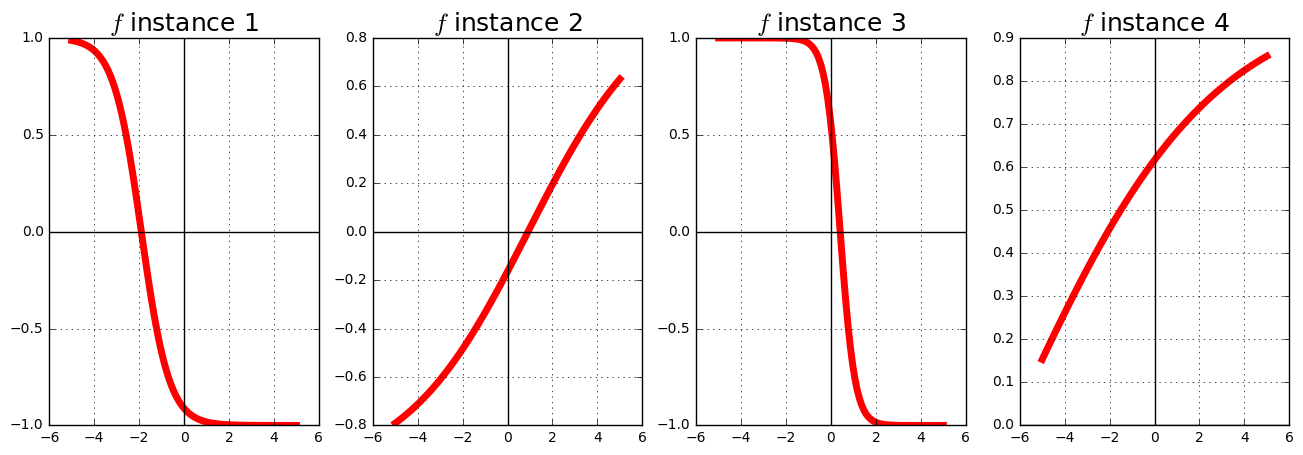

In [28]:
# build 4 instances of a composition basis: line and tanh
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (16,5))

for m in range(1,5):
    # make basis element
    w_0 = np.random.randn(1)
    w_1 = np.random.randn(1)
    fm = np.tanh(w_0 + w_1*x)
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],c='r',linewidth = 5)
    ax.set_title('$f$ instance ' + str(m),fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

If we keep composing these sorts of functions together we generally can create more and more flexible basis elements.  For example, if we compose another tanh into the basis element plotted in the previous cell we get

$$f(x)=\text{tanh}(w_0+w_1\text{tanh}(w_2 + w_3x))$$

We can sum up a number of the terms inside - say 10 of them - and have an even more flexible basis function

$$f(x)=\text{tanh}(w_0+w_1\text{tanh}(w_2 + w_3x)+w_4\text{tanh}(w_5+w_6x)+\cdot + w_{28}\text{tanh}(w_{29}+w_{30}x))$$


In the next Python cell we plot 4 random shapes such a basis element can take given randomly chosen values for its parameters.

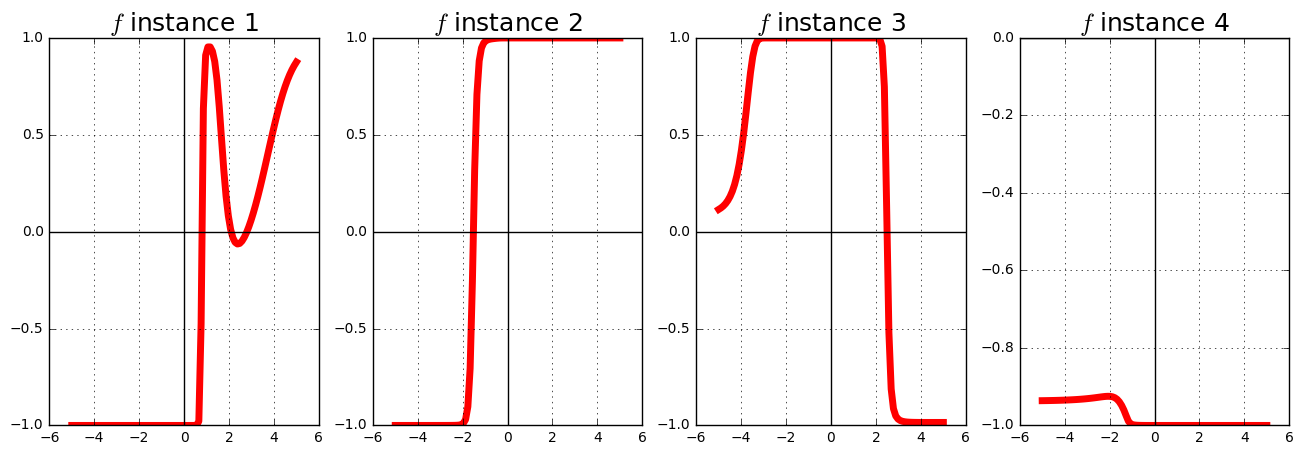

In [40]:
# build 4 instances of a composition basis: line and tanh and tanh
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (16,5))

for m in range(1,5):
    # make basis element
    fm = 0
    for j in range(10):
        w_0 = 3*np.random.randn(1)
        w_1 = 3*np.random.randn(1)
        w_3 = 3*np.random.randn(1)
        fm+=w_3*np.tanh(w_0 + w_1*x)
    w_2 = np.random.randn(1)
    w_3 = np.random.randn(1)
    
    fm = np.tanh(w_2 + fm)
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],c='r',linewidth = 5)
    ax.set_title('$f$ instance ' + str(m),fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

This sort of basis is referred to as a *neural network*, as it is commonly used as a (highly abstracted) model of neurons in the brain.  When thought about in obtruse biological terms the nonlinear function (e.g., tanh) is often referred to as an *activation function*.  Every level of composition is referred to as a *hidden layer* e.g., the first two examples were *single* hidden layer networks, while the second example is referred to as a neural network with *two* hidden layers.

In [2]:
# import class for visualizing complete function approximation
import sys
sys.path.append('demo_python_backend_files')

from super_viz_lib import RegressionFit
func_fit = RegressionFit.RegressionFit()
func_fit.load_target('demo_datasets/sin_function.csv')
func_fit.browse_fit(model_choice = 'nnet',param_range=np.arange(1,10))

ImportError: cannot import name MLPRegressor

# 2.  Regression data and mathematical functions

In order to faithfully represent a mathematical function above we *evenly sampled* part of an input region and used the function's equation to produce a corresponding mesh of input/output data points.  These generally outlined the function at hand, looking more and more like true 'continuous' picture the greater the number of samples we use.  One very fruitful way of thinking about generic nonlinear regression data is conceptually just adjacent to this faithful representation.  

Here is the idea: a generic nonlinear regression dataset consists of data points made by *un-evenly sampling* the input of some mathematical function, evaluating those inputs using the function's equation, and adding some noise to those outputs.  This idea is illustrated in the looping gif below.

<p>
<img src="demo_images/regr_to_func_approx.gif\" width=300 height=300/>
</p>

In the first slide of this animations a generic nonlinear regression dataset is shown.  Added to this dataset in the next slide is the core mathematical function (in dashed-black) the dataset is derived from - which we refer to as the *target function*.  Removing all noise from the dataset we can see how each point then falls exactly on the target function, and how together the points roughly trace it out - albeit unevenly.  Expanding the original regression dataset by adding more clean points we eventually fill out the target function giving a faithful representation of the underlying mathematical function.

If we knew the form of the target function underlying a generic nonlinear dataset our lives (in terms of solving regression problems) would be pretty easy: we wouldn't need to 'fit' anything to the data if we already knew the perfect fitting curve - i.e., the dataset's target function.  

Of course the problem with regression is that we don't know what this underlying function looks like in general.  Nonetheless this insight - that generic regression data are noisy samples of an underlying mathematical function - has huge ramifications for how we deal with the problem of nonlinear regression.  In particular it will imply - as we explore in the Sections below - that we can directly apply classic well-developed mathematical / computational tools for solving generic nonlinear regression problems.

## 2.1  Say hello to a few datasets

In the remainder of this notebook we are going to perform a range of experiments on a number of toy datasets - lets take a quick look at two of them we'll use several times.  The first is a two-dimensional set of points that looks very much like the data shown in the gif above.  

Activating the next two cells will plot this dot - along with its underlying target function (here shown in dashed red).

In [11]:
# THIS CELL NEEDS TO BE ACTIVATED IN ORDER TO USE ANY PROCEEDING PYTHON CELL
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('demo_python_backend_files')
from super_viz_lib.RegressionFit import RegressionFit
%matplotlib inline

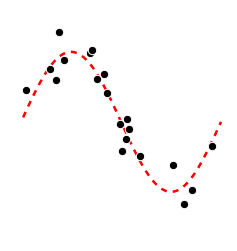

In [40]:
# make next instance
demo1 = RegressionFit()
demo1.load_data('demo_datasets/noisy_sin_sample.csv')
demo1.load_target('demo_datasets/sin_function.csv')

# initialize figure
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
demo1.show_setup(ax)

This dataset was generated by taking 20 random inputs $w$ on the interval $[0,1]$ and plugging these into the mathematical function

$$g(w) = \text{sin}(2\pi{}w)$$

(which is the target function shown in dashed red) and adding a small amount of noise. 

Our second dataset look slike this one - only its three-dimensional.  We plot this dataset in the next Python cell - along with its underlying target function (in red). 

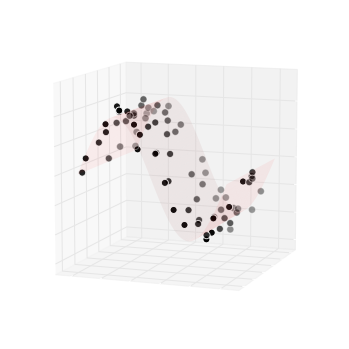

In [19]:
# make next instance
demo2 = RegressionFit()
demo2.load_data('demo_datasets/3d_noisy_sin_sample.csv')
demo2.load_target('demo_datasets/3d_sin_function.csv')

# initialize figure
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111,projection = '3d')
demo2.show_setup(ax)

This dataset was generated by taking 75 random inputs $(w_1,w_2)$ on the interval $[0,1]\times [0,1]$ and plugging these into the mathematical function

$$g(w_1,w_2) = \text{sin}(2\pi{}w_1)$$

(which is the target function shown in light red) and adding a small amount of noise. 

# 2.  The variety of bases used in machine learning
As in function approximation our ultimate goal with supervised learning is to produce a formula (using basis functions) that closely represents a dataset's underlying target function. However in supervised learning we must do this using only our noisy samples of this target.

Nonetheless, the same tools for function approximation are used for general nonlinear supervised learning.  And it is those tools - these elemental or basis functions - which we explore in this notebook. 

What sort of bases (or collections of relatively simple functions with known formulae) do we have at our disposal?  Lucky for us we can leverage the results of many previous generations' fruitful labor, who put in the work to discover / create a wide range of bases.

## 1.  Fixed kernel bases: pre-defined basis elements

The most basic (and first discovered) basis of elements is called a *fixed kernel basis*.  Such a basis consists of elements like polynomials or sine waves, which have no internal parameters that change their shape.  For example, the first few elements of the polynomial basis looks like 

$$f_0(x) = 1, ~~ f_1(x) = x^2, ~~ f_2(x) = x^3,...$$

and so forth with the $m^{th}$ element taking the form $f_m(x) = x^m$.  Once again notice that the basis elements here have no internal parameters that can be tuned.  The only parameter of a polynomial basis element - its *degree* - is defined by the element's index (e.g., $f_m(x)$ has degree parameteter = $n$).

Lets draw out these first few elements of the polynomial basis. 

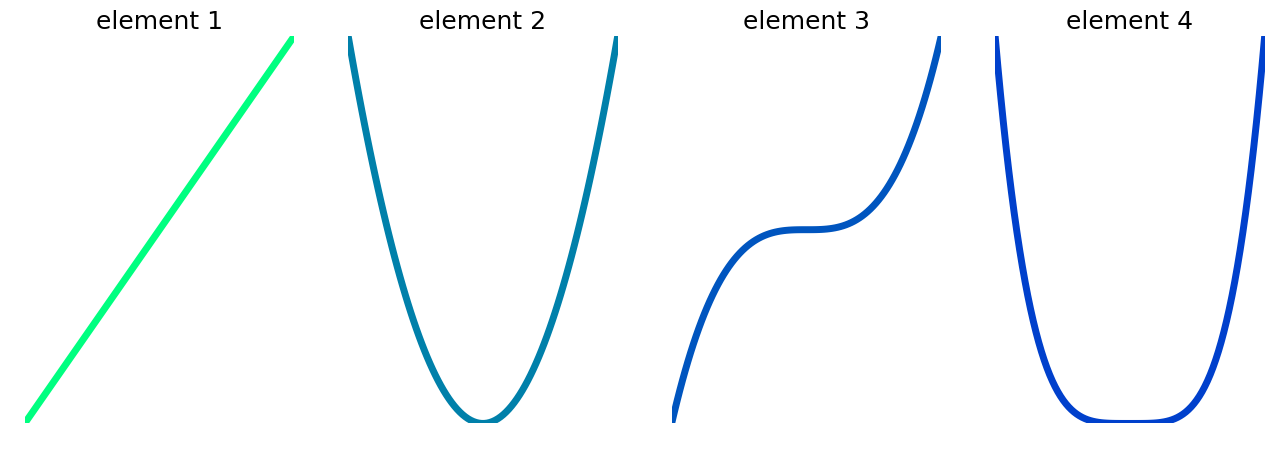

In [3]:
# import Draw_Bases class for visualizing various basis element types
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

# plot the first 4 elements of the polynomial basis
bases.show_1d_poly()

Now that we know what they look like, lets put them to work.  

First lets use the polynomials to approximate a complete function, solving a pure *function approximation* problem.  That is, lets take a complete function and approximate it using polynomials.

In the Pyton cell that follows we take in a complete function (shown in red) and fit a given number of polynomials to it (shown in blue).  The exact number of elements used is controlled via a slider.

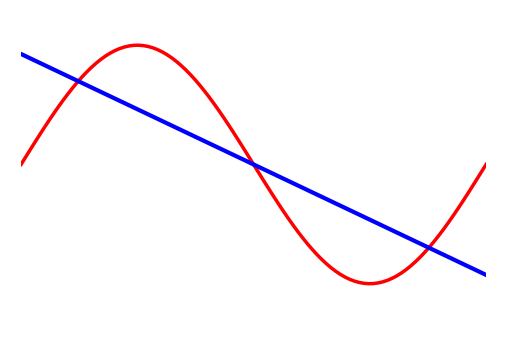

In [4]:
# import class for visualizing complete function approximation
from Function_Fit_Demo1 import Fit_Bases
%matplotlib inline
func_fit = Fit_Bases()
func_fit.load_target('demo_datasets/sin_function.csv')
func_fit.browse_poly_fit()

As you move the slider from left to right, you add another element to the basis approximation.  Notice that as you do this the approximation (in blue) consistently gets better.

Now lets switch over to the supervised learning case - where we only have access to noisy samples of the target function.  In the next Python cell we show this scenario, where you can play around with the number of polynomial elements used by adjusting a slider.  Note that in this demonstration the true completed underlying target function is shown in dashed red, while the noisy samples from it are black points, and once again the approximation is shown in blue.

In [1]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo1 import Fit_Bases
%matplotlib inline
data_fit = Fit_Bases()
data_fit.load_data('demo_datasets/noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/sin_function.csv')
data_fit.browse_poly_fit()

ImportError: No module named Data_Fit_Demo1

Notice here that the approximation (the blue curve) gets better (i.e., it approximates the red dashed target function) as you increase the number of basis elements used - but only up to a certain number of elements.  Once you surpass this number, the fit actually becomes worse!  This is called *overfitting* and is one key difference between pure function approximation and supervised learning.

Since it is not always the case - as it was with pure function approximation - that more elements provide a better approximation in supervised learning, *cross-validation* must be used to ensure that just enough elements are used, but not too many.  In this example cross-validation would choose the correct (not too small, not too big) value on the slider, i.e., just the right number of elements.

## 2.  Neural networks: compositionally defined basis elements

Unlike polynomials and other fixed kernel bases, each element of a neural network basis has internal parameters that can be tuned to change the shape of the basis function considerably.

Each element of a neural network basis consists of *composition of parameterized functions*.  Typically the functions in this composition, referred to as *activation functions*, are themselves quite simple (e.g., $max$, $tanh$, etc.,) but when composed create a flexible element.

The simplest such neural network basis - referred to as a *neural network basis with 1 hidden layer* - consists of elements that are each just a single elementary function.  While all elements take the same algebraic form, the parameters allow each to take on their own (potentially) unique shape.  

For example, the $m^th$ element of a single hidden layer neural network basis employing the max or 'rectified linear unit' activation function look algebraically like

$f_m(x) = \text{max}(0, c_m + \mathbf{x}^T\mathbf{v}_m)$

In the next Python cell we plot 4 random shapes such a basis element can take given randomly chosen values for its parameters.

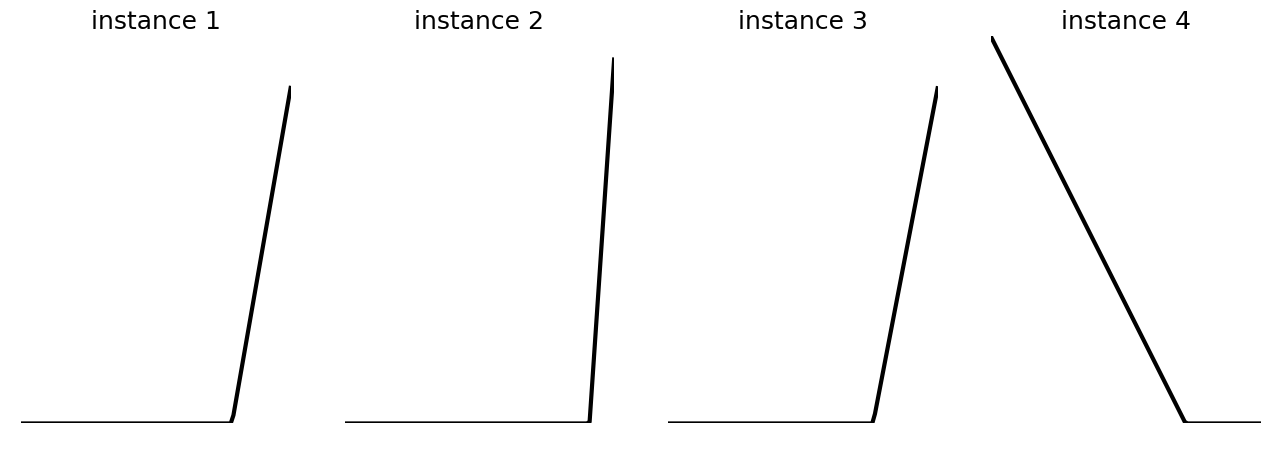

In [6]:
# import Draw_Bases class for visualizing various basis element types
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

# plot the first 4 elements of the polynomial basis
bases.show_1d_net(num_layers = 1)

Composing the activation function again with itself yeilds a neural network basis element with 2 hidden layers (more specifically we take a linear combination of units that look like the basis element above, and then shove this through the same activation function), whose $m^{th}$ element takes the form

$f_m(x) = \text{max}(0,c_m^{(1)} + \sum_{m_2=1}^{M_2} \text{max}(0,c_{m_2}^{(2)} + \mathbf{x}^T\mathbf{v}_{m_2}^{(2)})v_{{m_2},{m}}^{(1)}$

Such an element is considerably more flexible than the single hidden analog, as the composition allows for a greater array of shapes.

In the next Python cell we illustrate 4 instances of this sort of basis element.  Remember - this is one basis element, with 4 random selections of parameters.

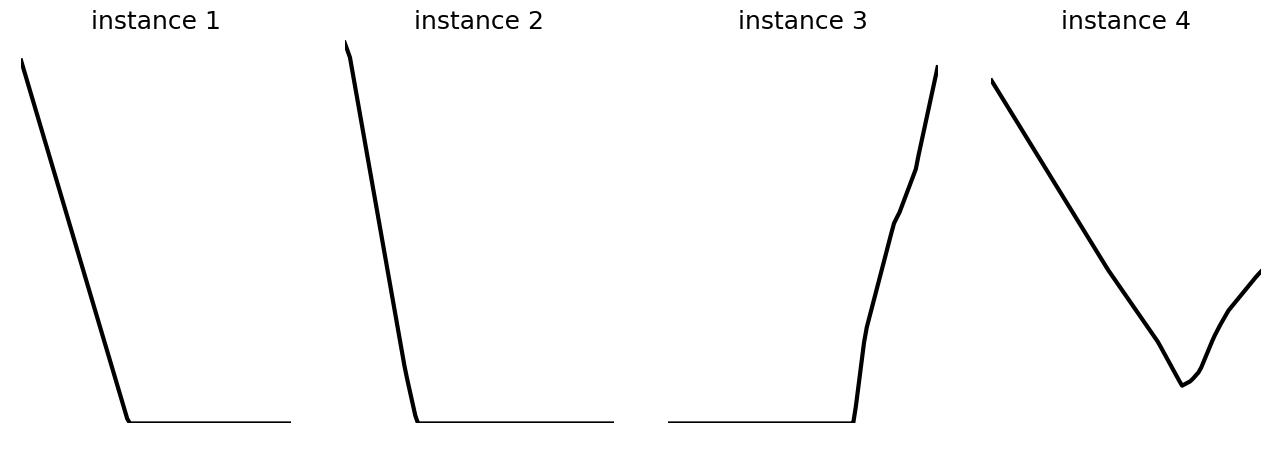

In [7]:
# import Draw_Bases class for visualizing various basis element types
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

# plot the first 4 elements of the polynomial basis
bases.show_1d_net(num_layers = 2)

And we can go on composing functions, creating neural network bases with more hidden layers.  Typically those with 4 or more layers are referred to as *deep networks*.

Lets take a quick look at 4 random instances of a single deep network basis element - say with 20 hidden layers.

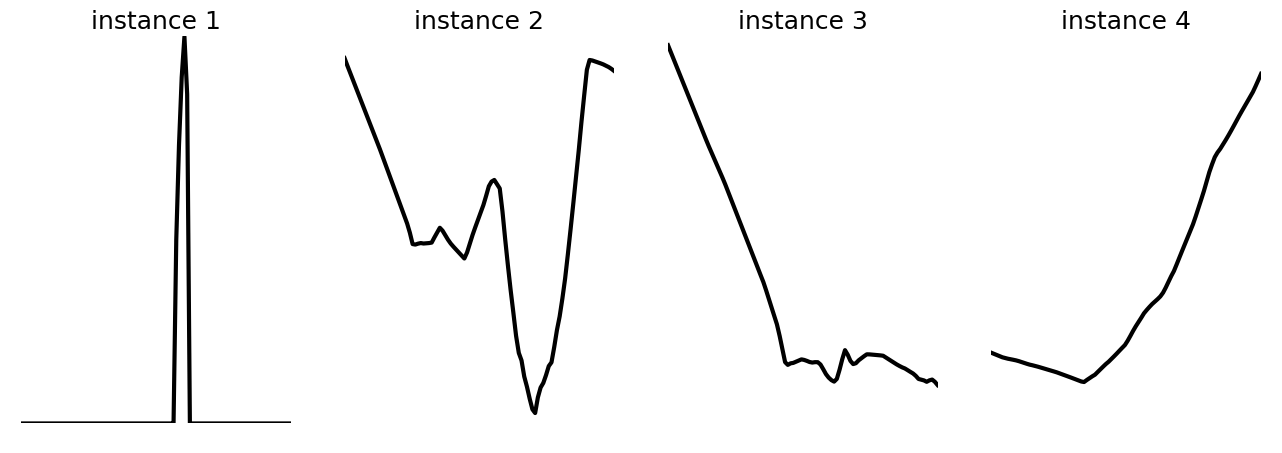

In [8]:
# import Draw_Bases class for visualizing various basis element types
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

# plot the first 4 elements of the polynomial basis
bases.show_1d_net(num_layers = 20)

Quite a bit of variety in terms of their shapes, no?

Lets use these basis elements to approximate a complete function, as we did above with polynomials.  In the next cell you can control the number of elements (using a slider) from a single hidden layer neural network basis used to approximate a complete function.

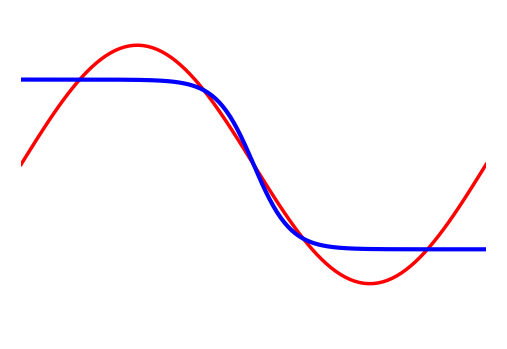

In [9]:
# import class for visualizing complete function approximation
from Function_Fit_Demo1 import Fit_Bases
%matplotlib inline
func_fit = Fit_Bases()
func_fit.load_target('demo_datasets/sin_function.csv')
func_fit.browse_net_fit()

As with the polynomials, again notice that the larger the number of elements used, the better the approximation becomes.

Back to the supervised learning case - where we only have access to noisy samples of the target function.  In the next Python cell we show this scenario, where you can play around with the number of neural network elements used by adjusting a slider.  

Note that in this demonstration the true completed underlying target function is shown in dashed red, while the noisy samples from it are black points, and once again the approximation is shown in blue.

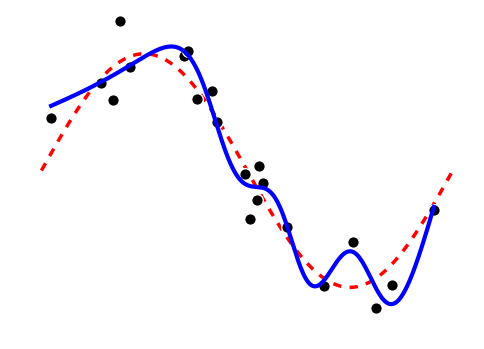

In [5]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo1 import Fit_Bases
%matplotlib inline
data_fit = Fit_Bases()
data_fit.load_data('demo_datasets/noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/sin_function.csv')
data_fit.browse_net_fit()

As with the polynomial basis previously, notice here that the approximation (the blue curve) gets better (i.e., it approximates the red dashed target function) as you increase the number of neural network basis elements used - but only up to a certain number of elements. Once you surpass this number, the fit actually becomes worse!  This is called *overfitting*.  Again we see one key difference between pure function approximation and supervised learning.

As with polynomials, again *cross-validation* must be used to determine the proper number of elements to use for supervised learning problems.  In this example cross-validation would choose the correct (not too small, not too big) value on the slider, i.e., just the right number of elements.

## 3.  Decision Trees: recursively defined basis elements

Like neural networks, a single tree basis element can take on a wide array of shapes.  Also similar to neural nets, trees can have multiple layers (called the level of *depth*) and the more layers a tree basis element has the wider the array of shapes it can take.  

These 'layers' come not from composing functions together, but by creating flexible functions via a *recursive* process.  Additionally, trees are highly discontinuous and are typically constructed along individual dimensions of a feature space (unlike neural nets, which are tuned along all dimensions of a feature space simultaneously). 

The simplest sort of tree basis consists of indicator functions or, as they are more commonly referred to, *stumps* whose break lies along a single dimension of the feature space.  These are simple step functions whose top and bottom steps break along a single dimension.  

A stump with 1-dimensional input $x$ can be written as 

<img src="demo_images/depth1.png\" width=800 height=600/>

where $V_{1}$ is split point at which the stump changes values, and $y_{1}$ and $y_{2}$ are values taken by the two sides of the stump, respectively, which we refer to as *levels* of the stump.

In the python cell that follows we plot four instances of such a stump basis element.

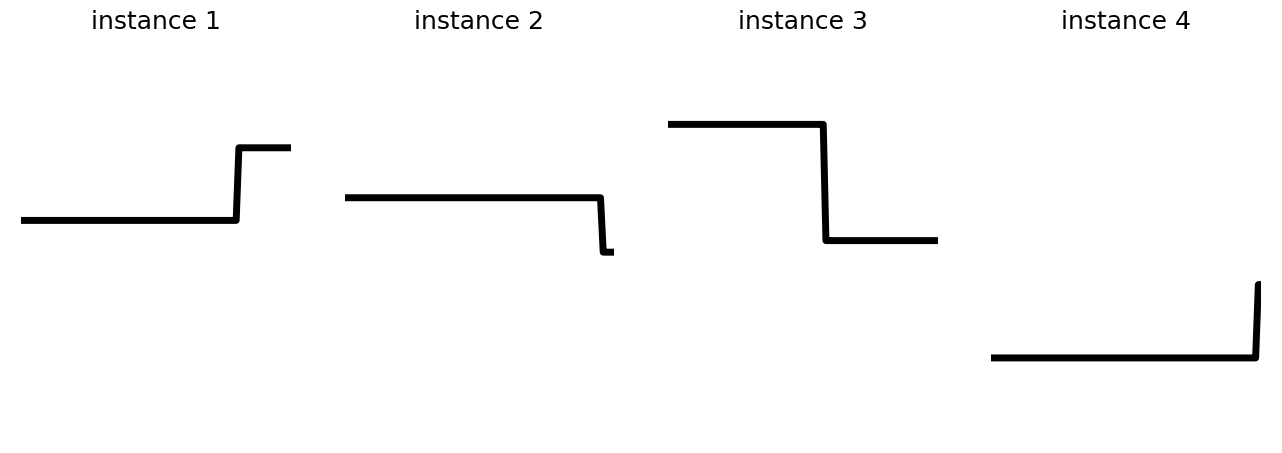

In [11]:
# import Draw_Bases class for visualizing various basis element types
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

# plot the first 4 elements of the polynomial basis
bases.show_1d_tree(depth = 1)

To create a more flexible decision tree basis function we split each level of the stump.  This gives us a *tree* of depth 2 (our first split gave us a stump, another phrase for stump is tree of depth 1).  

Mathematically we write the form of a tree basis element of depth 2 as 

<img src="demo_images/depth2.png\" width=800 height=600/>

This gives a basis element with four (potentially) distinct levels.  Since the location of the splits and the values of the levels can be set in many ways, this gives each element of a tree basis of depth 2 a good deal more flexibility than stumps. 

In the next python cell we plot

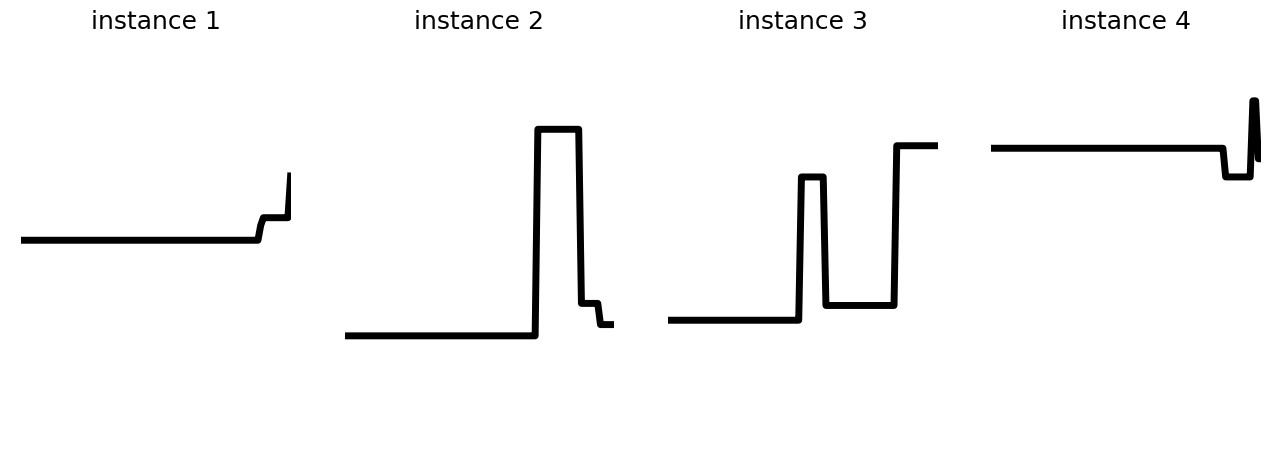

In [12]:
# import Draw_Bases class for visualizing various basis element types
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

# plot the first 4 elements of the polynomial basis
bases.show_1d_tree(depth = 2)

To make an even more flexible basis elements we simply split the levels of a given tree basis element.   

This gives decision tree elements a distinctly recursive structure: to create a depth (d+1) tree basis element we simply split each level of a basis element of depth d.

This gives a single decision tree element of high depth a great amount of flexibility.  In the next python cell we show 4 instances of a tree basis element with depth = 5.

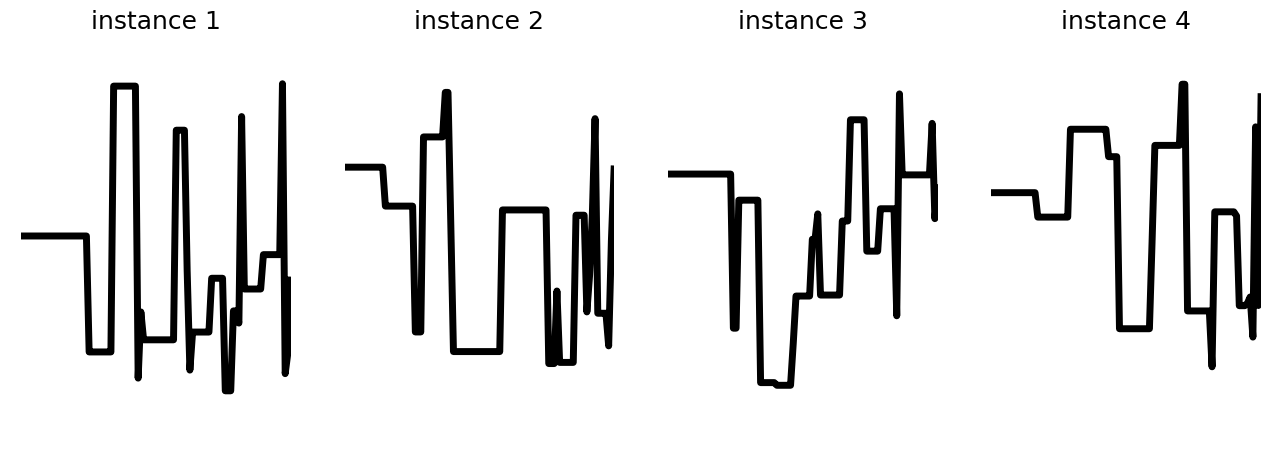

In [13]:
# import Draw_Bases class for visualizing various basis element types
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

# plot the first 4 elements of the polynomial basis
bases.show_1d_tree(depth = 5)

These are extremely flexible.

Lets turn and use these basis elements to approximate a complete function, as we did above with polynomials and neural networks previously.  In the next cell you can control the number of elements (using a slider) from a basis of trees with depth 2 used to approximate a complete function.

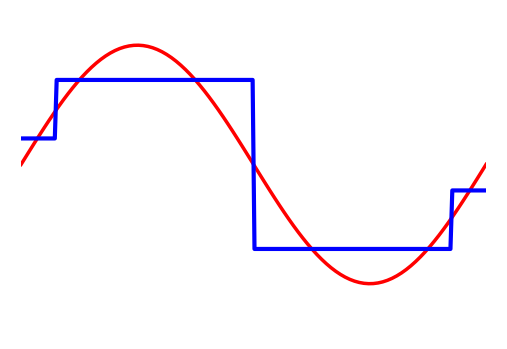

In [14]:
# import class for visualizing complete function approximation
from Function_Fit_Demo1 import Fit_Bases
%matplotlib inline
func_fit = Fit_Bases()
func_fit.load_target('demo_datasets/sin_function.csv')
func_fit.browse_tree_fit()

As with the previous bases, the more elements we use here the better off the approximation.  

Lets turn to the supervised version of the problem, where we have only noisy sasmples of the target function.  In the next Python cell you can control the number of trees used to fit a supervised dataset (using a slider, as with the previous examples).

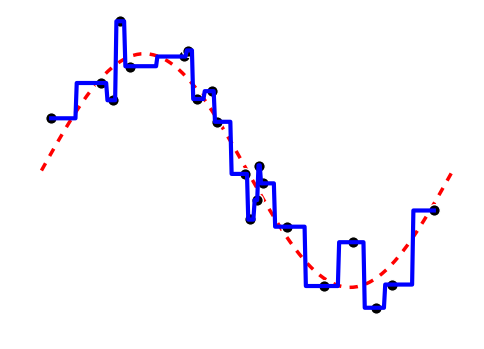

In [4]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo1 import Fit_Bases
%matplotlib inline
data_fit = Fit_Bases()
data_fit.load_data('demo_datasets/noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/sin_function.csv')
data_fit.browse_tree_fit()

Notice here that the approximation (the blue curve) gets better (i.e., it approximates the red dashed target function) as you increase the number of basis elements used - but only up to a certain number of elements.  Once you surpass this number, the fit actually becomes worse!  This is called *overfitting* and is one key difference between pure function approximation and supervised learning.

Since it is not always the case - as it was with pure function approximation - that more elements provide a better approximation in supervised learning, *cross-validation* must be used to ensure that just enough elements are used, but not too many.  In this example cross-validation would choose the correct (not too small, not too big) value on the slider, i.e., just the right number of elements.

# 4.  Higher dimensional regression problems

While we have been looking at two dimensional examples so far, everything discussed in terms of how the shape of each type of basis - kernels, neural networks, and trees - fit a dataset carries over analagously to higher dimensional examples of regression as well.  You can see this by tinkering around with the demonstrations in this Section, which allow you to fit a given number of basis functions of each type to a three-dimensional toy dataset.  This dataset - along with the true underlying function in red - are illustrated via the next Python cell.

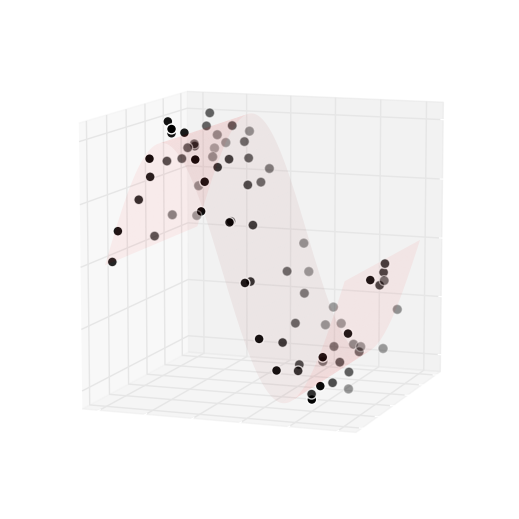

In [3]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo_3d import two_dim_regression_fits
%matplotlib inline
data_fit = two_dim_regression_fits()
data_fit.load_data('demo_datasets/3d_noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/3d_sin_function.csv')
data_fit.plot_basics()

## Fixed basis kernel fit

The next cell allows you to see the result of fitting various degree polynomials to the dataset.  Note: the slider is already cached in the notebook, and creating a new one via the Python cell below can take a minute or two.

In [1]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo_3d import two_dim_regression_fits
%matplotlib inline
data_fit = two_dim_regression_fits()
data_fit.load_data('demo_datasets/3d_noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/3d_sin_function.csv')
data_fit.browse_poly_fit()

Traceback (most recent call last):
  File "/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1120, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 301, in wrapped
    return f(*args, **kwargs)
  File "/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 346, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/opt/conda/envs/python2/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/opt/conda/envs/python2/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/opt/conda/envs/python2/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

## Neural network fit

The next cell allows you to see the result of fitting varying number of neural network basis elements to the dataset.  Note: the slider is already cached in the notebook, and creating a new one via the Python cell below can take a minute or two.


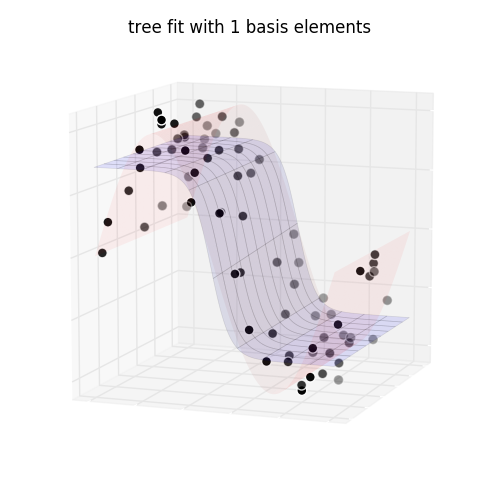
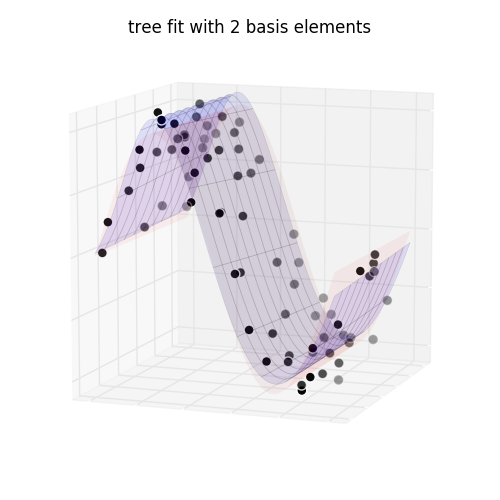
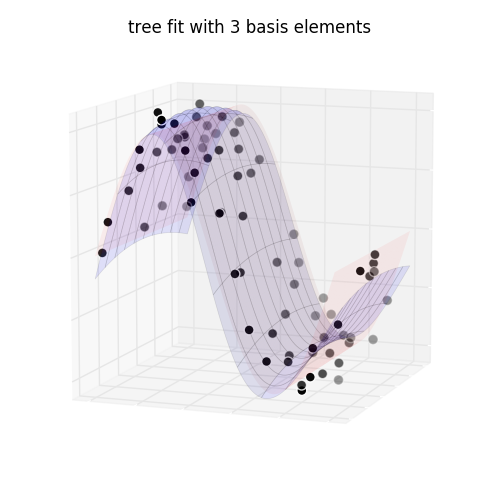
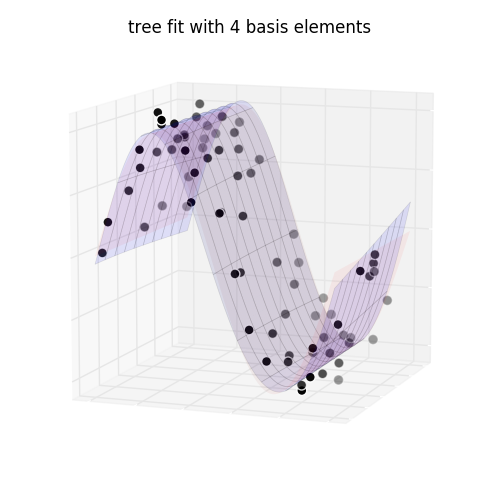
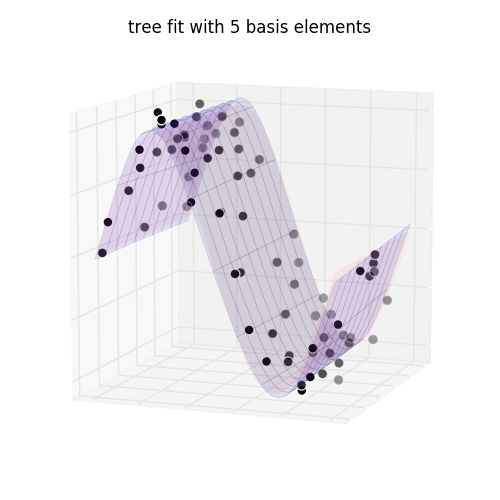
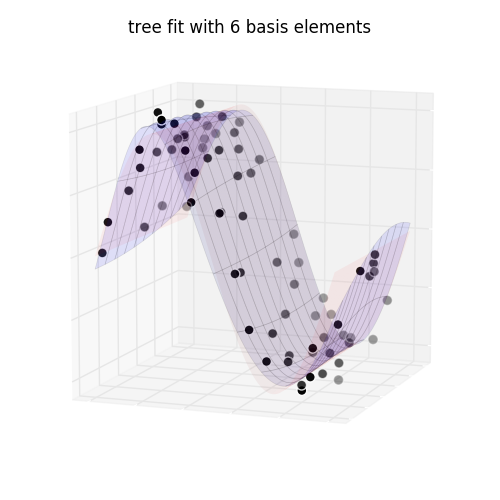
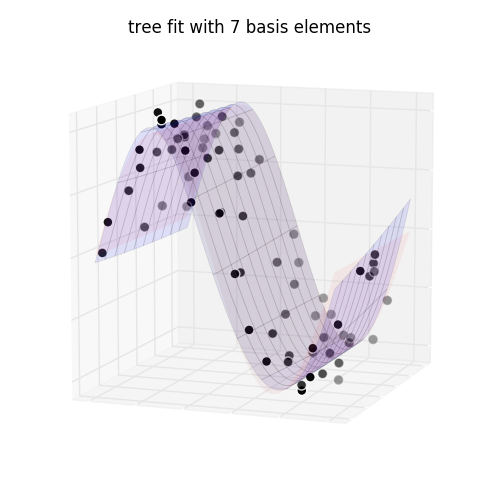
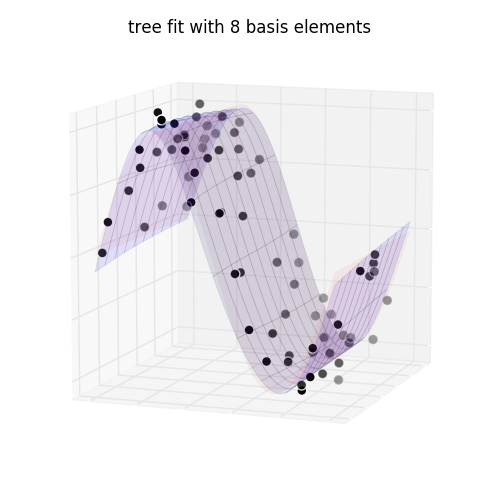
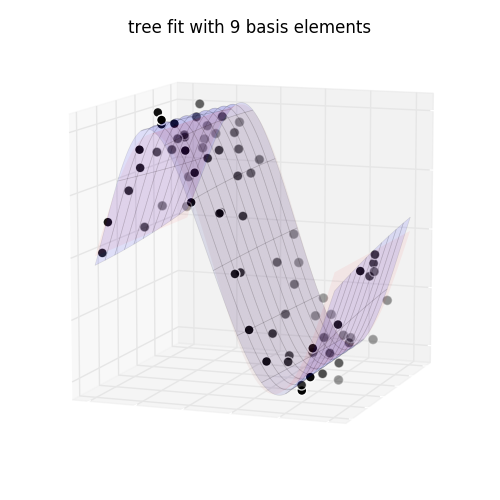
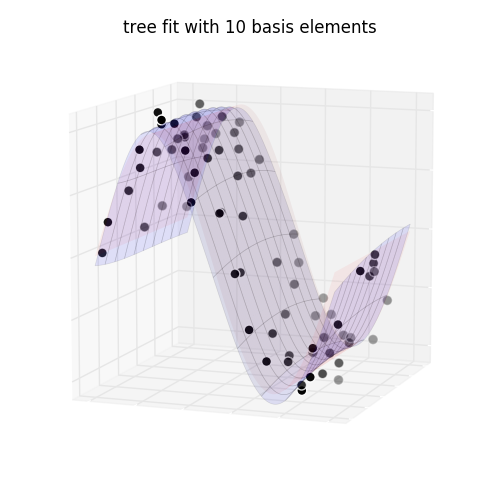
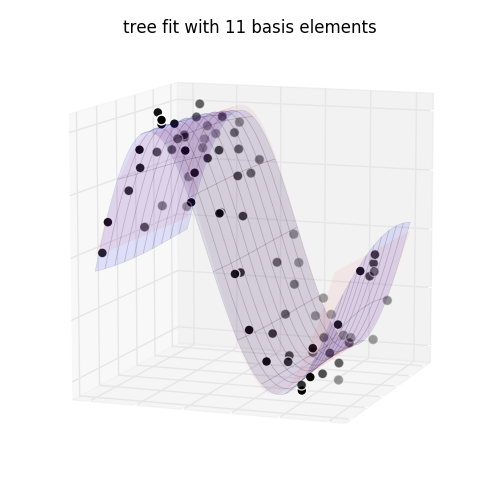
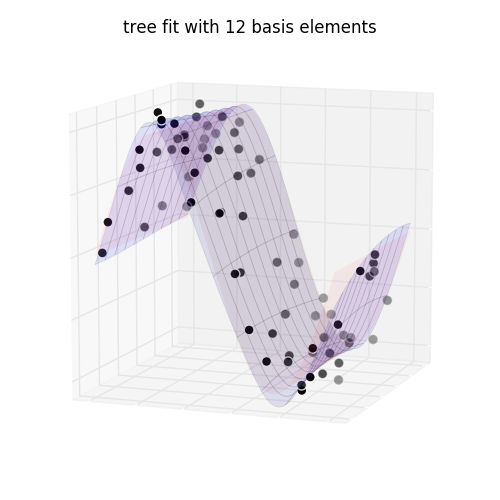
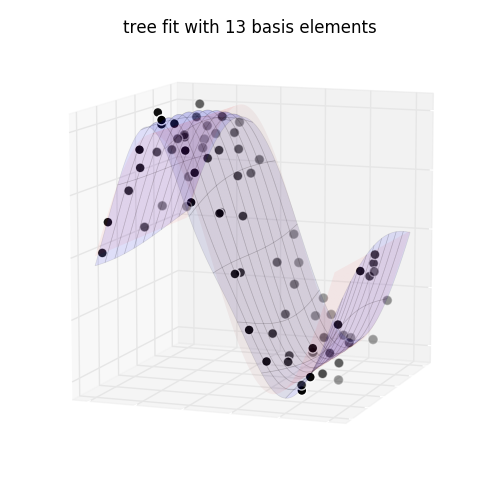
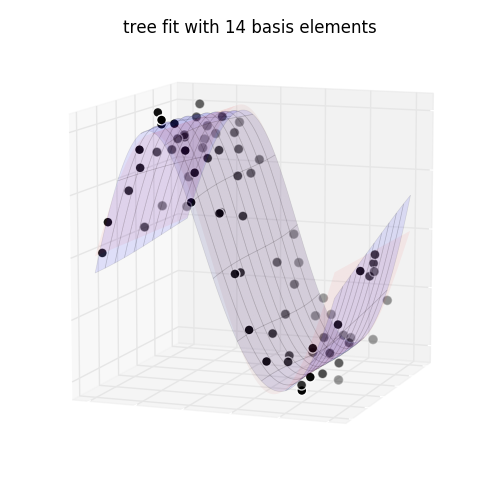
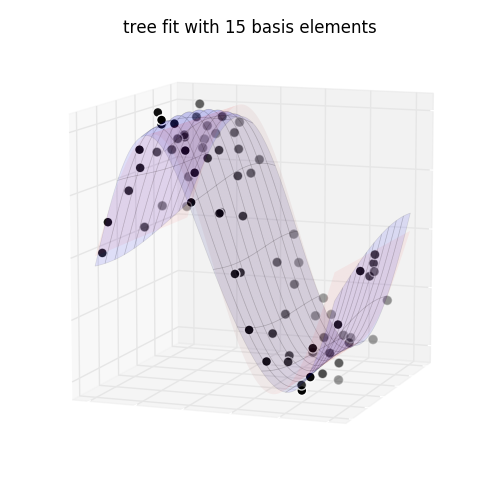
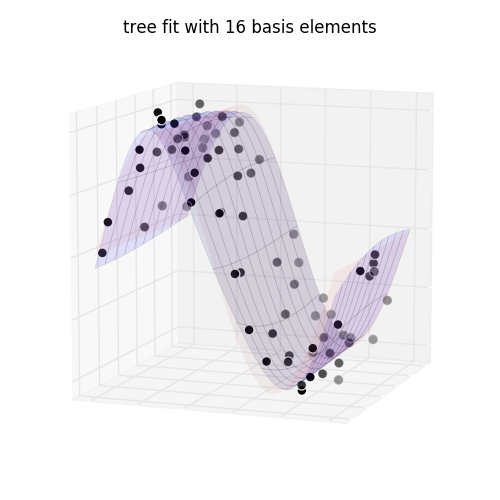
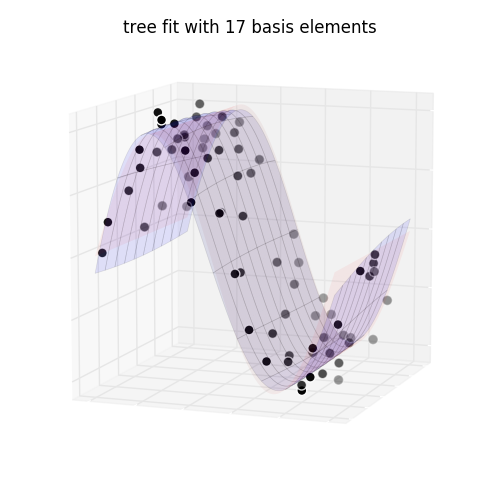
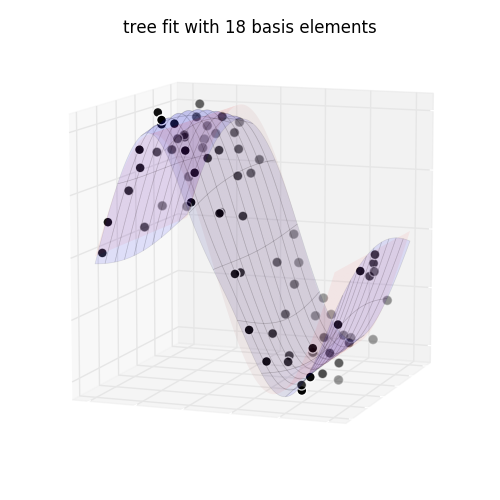
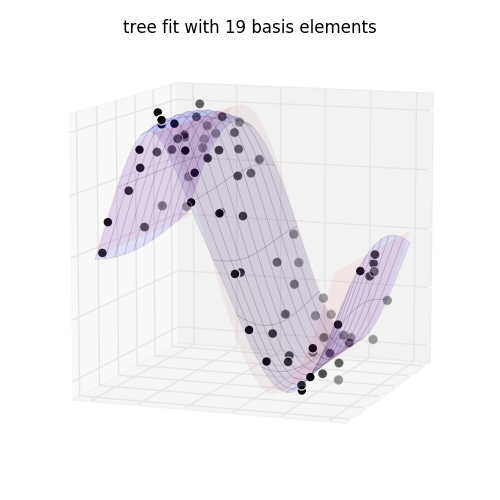
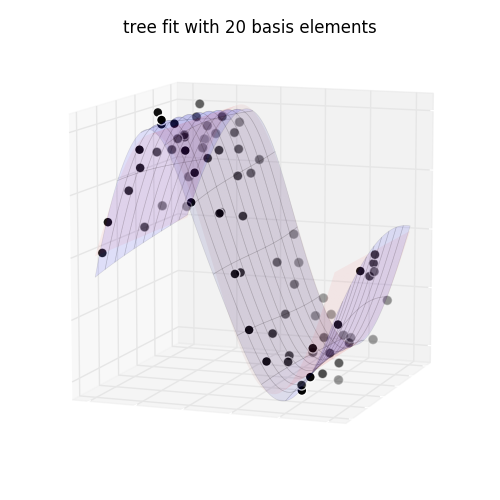

In [5]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo_3d import two_dim_regression_fits
%matplotlib inline
data_fit = two_dim_regression_fits()
data_fit.load_data('demo_datasets/3d_noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/3d_sin_function.csv')
data_fit.browse_net_fit()

## tree-based fit

The next cell allows you to see the result of fitting varying number of tree basis elements (here each is a stump) to the dataset.  Note: the slider is already cached in the notebook, and creating a new one via the Python cell below can take a minute or two.


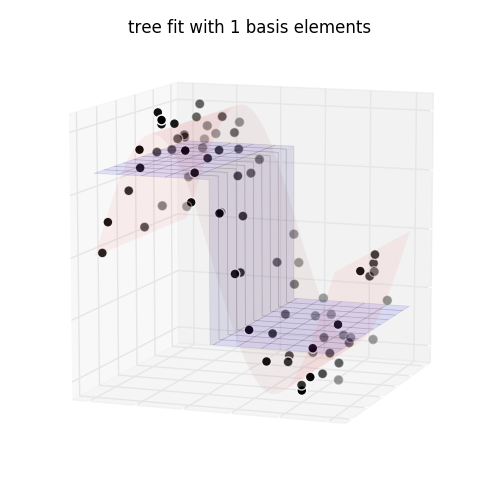
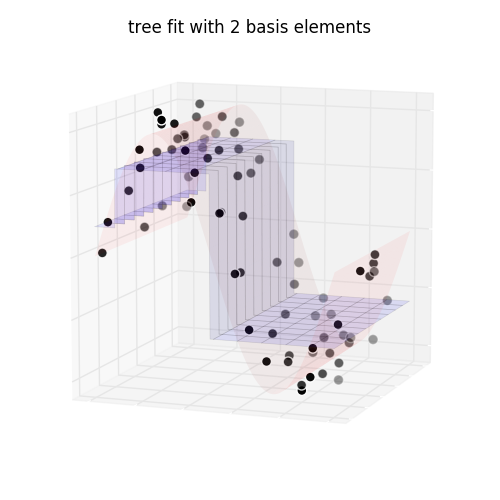
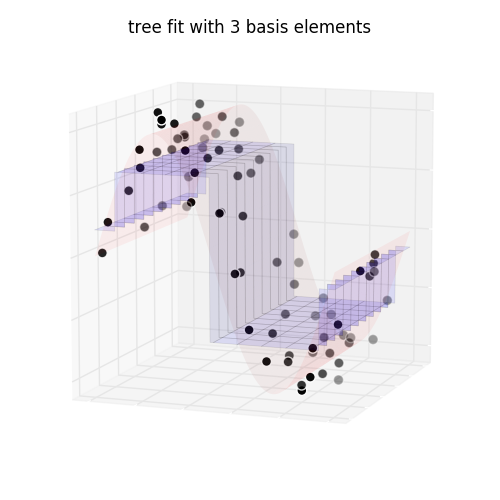
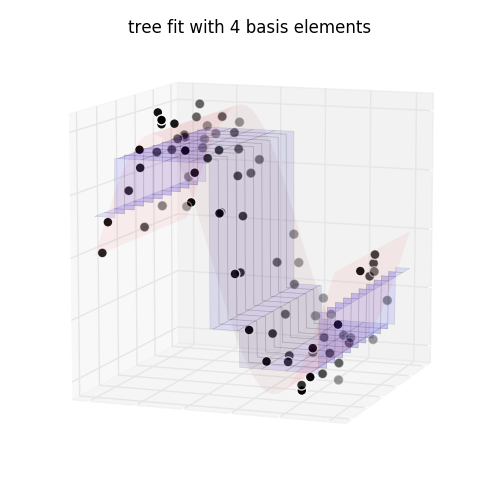
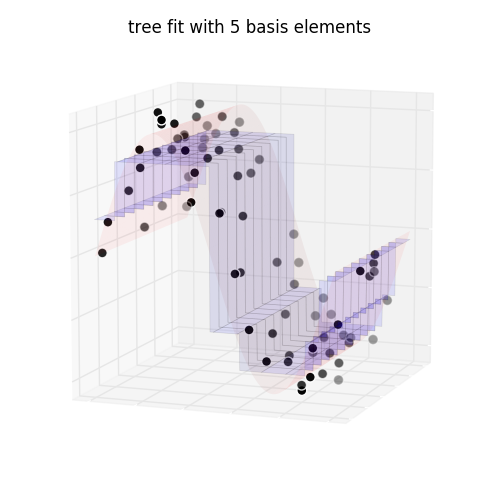
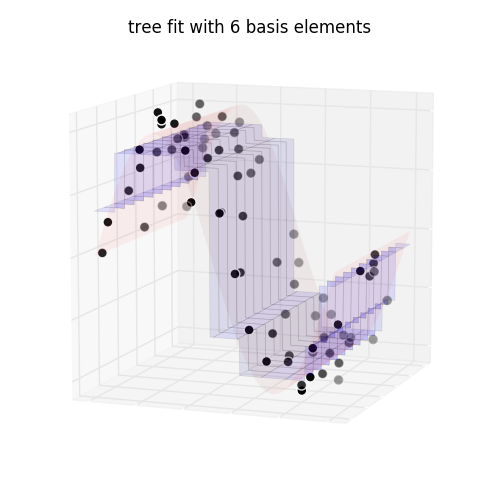
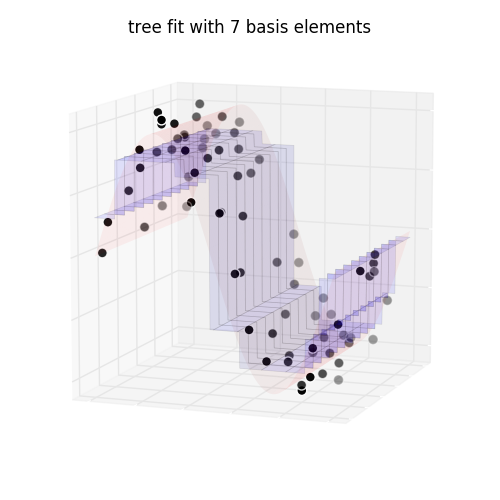
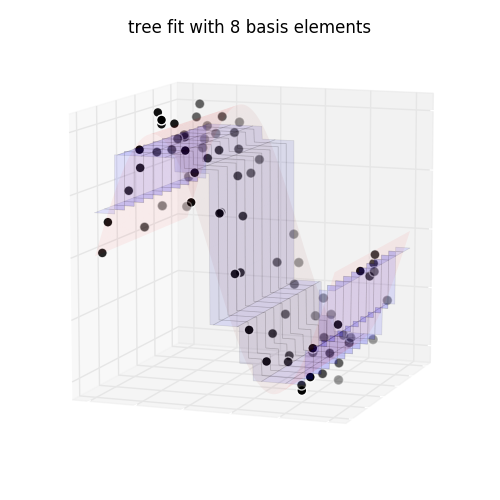
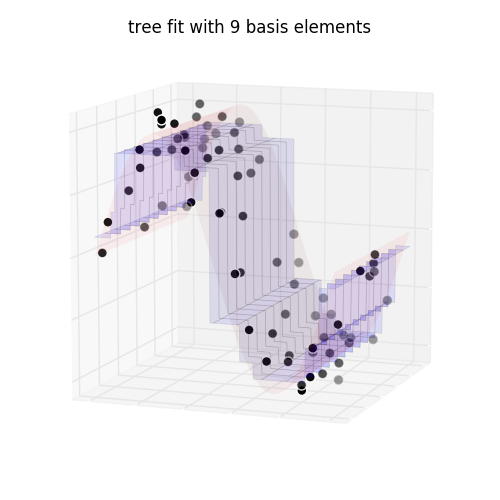
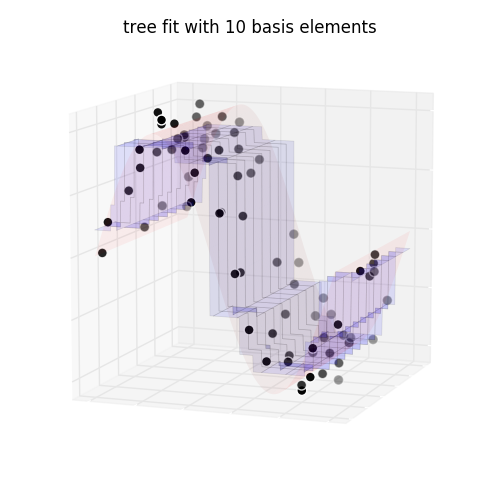
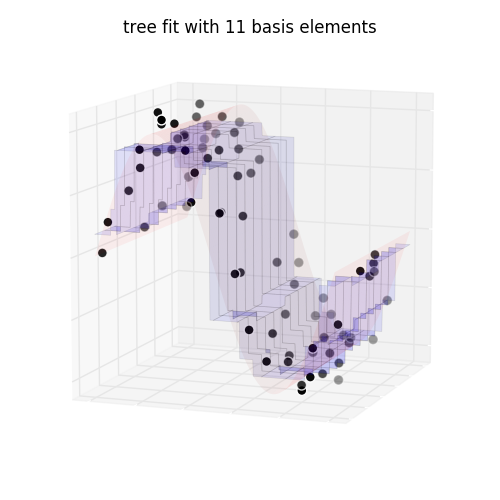
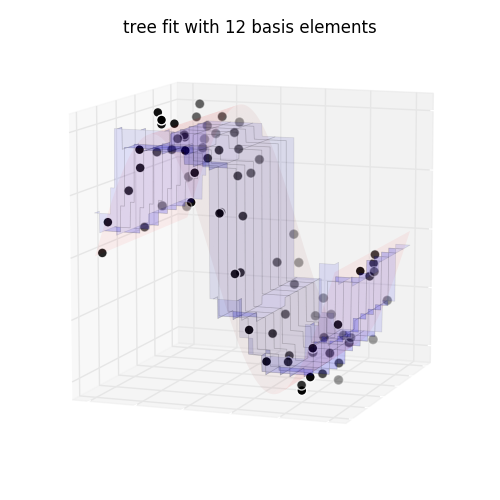
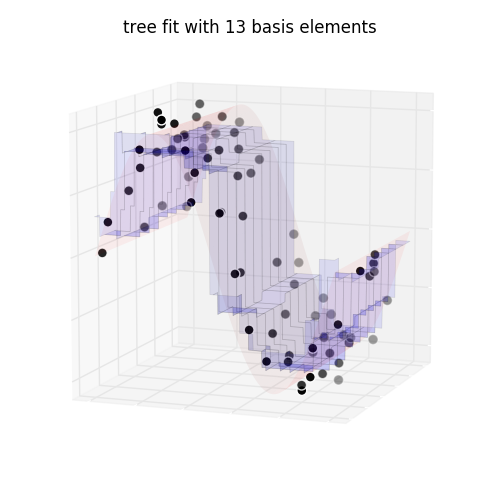
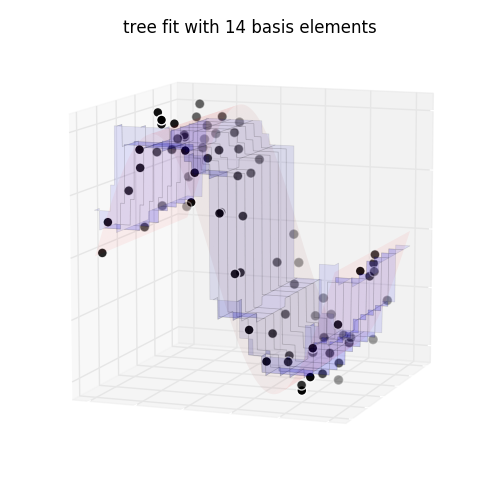
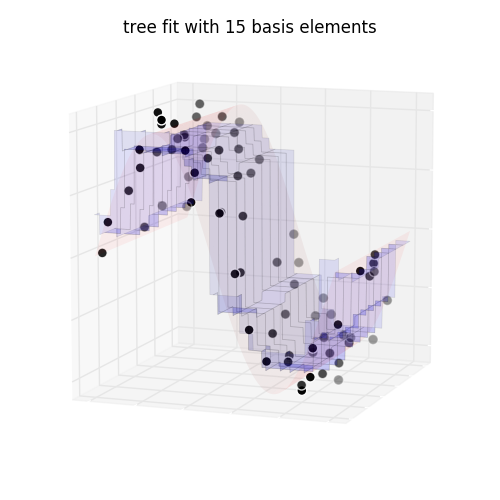
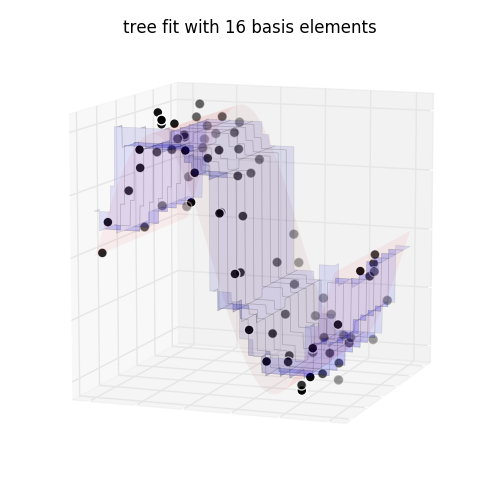
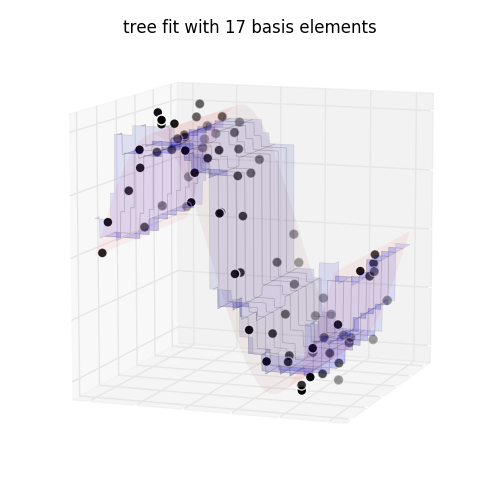
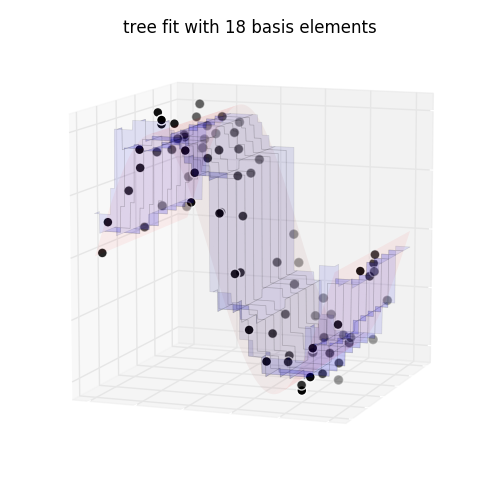
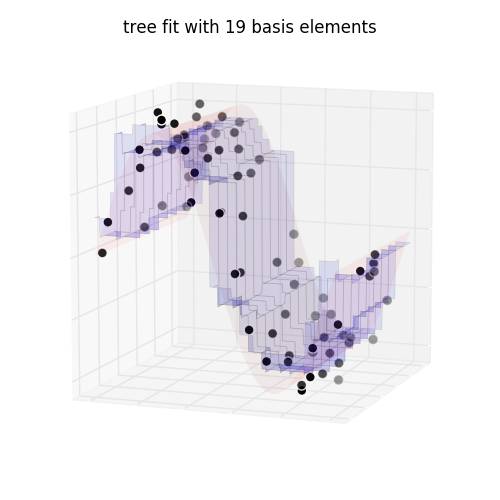
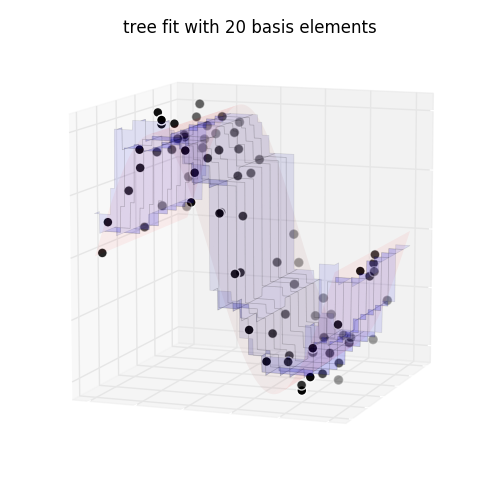

In [6]:
# import class for visualizing complete supervised learning (i.e., noisy sampled function approximation)
from Data_Fit_Demo_3d import two_dim_regression_fits
%matplotlib inline
data_fit = two_dim_regression_fits()
data_fit.load_data('demo_datasets/3d_noisy_sin_sample.csv')
data_fit.load_target('demo_datasets/3d_sin_function.csv')
data_fit.browse_tree_fit()

## 5.  Summary of Bases


- In the pure case of function approximation all bases - fixed, compositional (neural nets), and recursive (trees) -  work equally well.  That is they can all approximate a true function as finely as desired.


- Each sort of basis - fixed, neural nets, and trees - for pure function approximation are commonly employed in machine learning.


    - Each element of a fixed basis is a simple continuous function.  All basis elements are distinct in a fixed basis, with each element having its own unique shape.

    - Each element of a neural net basis is a *composition* of simple continuous functions (and so is itself continuous).  All basis elements have the same compositional structure (and mathematical form), however this compositional structure allows each one to take on a wide array of different shapes.

    - Each element of a tree basis is a *recursive combination* of simple discontinuous stump functions, with each stump acting on a single dimension of the feature space (since each tree consists of discontinuous stumps, it too is discontinuous).  All basis elements have the same recursive structure, however this recursive structure allows each one to take on a wide array of different shapes. 
    

- Supervised learning is a special case of *function approximation*, where we have access to only a small (potentially noisy) samples of a target function.  


    - Using this (relatively small) set of input-output pairs we aim to approximate the underlying target function.  In particular, we want a formula for this approximation - hence the use of *bases of functions* with known formulae.  By combining basis elements we create an approximation to the true target function with a known formula.
    
- Because we only have (noisy) samples of the target function with supervised learning
     
     
     - unlike the pure function approximation problem where more elements always produce a better approximation, adding too many basis elements to our supervised approximation creates the problem of *overfitting*.  This requires the use regular use of a *cross-validation* procedure to control the number of basis elements / parameter settings used.
    
    - one basis can work substantially better than others in practice for a particular problem, given the nature of the true target function and the quality (size, distribution, noise-level) of the samples.  e.g., trees often work well for metadata, Fourier elements for periodic data, deep (convolutional) networks for data with local contiguous structure 